# The World Happiness Report in 2021

The World Happiness Report is a publication that surveys the state of globe of happiness. Shared anually, the report contains articals and rankings of national happiness, based on respondant answers merged with quality of life metrics such as education,crime rate,health care. Published by the United Nations Substainable Development Solutions Network and data primarily coming from the Gallup World Poll.



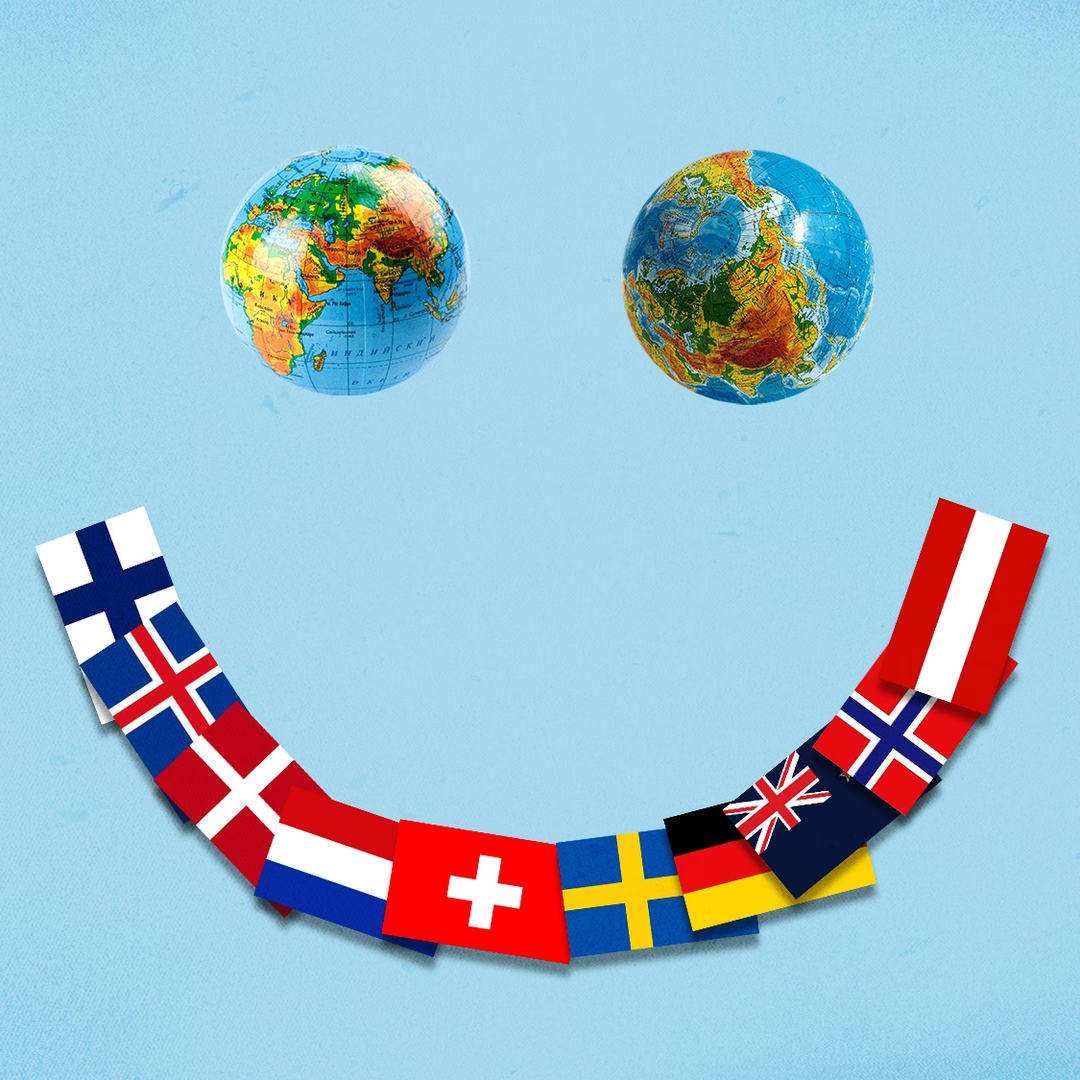

In this notebook , we are going to analyze the world happiness based different metrics such as:Happiness score , Gdp per capital , generosity , social support etc... The dataset contains information about these different metrics for each country and region , we are going to use this data to answer the following questions: 

* What are the top 10 happiest countries.
* what are the least 10 happiest countries.
* What are the average happiness scores by region?
* which countries countributed the most to the highest average happiness score for the top 2 happiest regions and the least 2 happiest regions.
* what are the top 10 countries for healthy life expectancy?
* What are the most generous countries with the best social support? is there any relationship?
* What are the countries with the highest healthy life expectancy and GDP per capita? Is there any relationship?
* Is there is any relationship between Happiness score , life expectancy , GDP per capita and Social support?

In [1]:
# Loading the libraries 
library(RODBC)
library(odbc)
library(readr)
library(ggplot2)
library(data.table)
library(dplyr)
library(corrplot)

Warning message:
"package 'odbc' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

corrplot 0.92 loaded


In [2]:
# loading the SQL Connection
conn <- odbcConnect("sqlconnect")
conn

RODBC Connection 1
Details:
  case=nochange
  DSN=sqlconnect
  UID=
  Trusted_Connection=Yes
  WSID=AICHA
  DATABASE=master

In [3]:
# loading the dataframe into R 
WH2021_report <- read.csv("C:/Users/Atolb/WH2021_report.csv",sep=",")

In [4]:
# structure of the dataframe 
str(WH2021_report)
setDT(WH2021_report)

'data.frame':	149 obs. of  20 variables:
 $ ï..Country.name                           : Factor w/ 149 levels "Afghanistan",..: 41 34 129 55 97 104 128 79 98 7 ...
 $ Regional.indicator                        : Factor w/ 10 levels "Central and Eastern Europe",..: 10 10 10 10 10 10 10 10 6 10 ...
 $ Ladder.score                              : num  7.84 7.62 7.57 7.55 7.46 ...
 $ Standard.error.of.ladder.score            : num  0.032 0.035 0.036 0.059 0.027 0.035 0.036 0.037 0.04 0.036 ...
 $ upperwhisker                              : num  7.9 7.69 7.64 7.67 7.52 ...
 $ lowerwhisker                              : num  7.78 7.55 7.5 7.44 7.41 ...
 $ Logged.GDP.per.capita                     : num  10.8 10.9 11.1 10.9 10.9 ...
 $ Social.support                            : num  0.954 0.954 0.942 0.983 0.942 0.954 0.934 0.908 0.948 0.934 ...
 $ Healthy.life.expectancy                   : num  72 72.7 74.4 73 72.4 73.3 72.7 72.6 73.4 73.3 ...
 $ Freedom.to.make.life.choices              : nu

In [5]:
# selecting the columns that we need for the analysis 
WH2021_report <- WH2021_report[,c(1:3,7:14,20)]

In [6]:
# viewing the final structure of dataframe 
colnames(WH2021_report) <- c("Country","Region","Happiness_score","Economy_gdp_per_capital","Social_support","Healthy_life_expectancny","Freedom","Generosity","Perceptions_of_corruption","Ladder_score_dystopia","Explained_by_log_gdp","Dystopia_residual")
head(WH2021_report,3)

Country,Region,Happiness_score,Economy_gdp_per_capital,Social_support,Healthy_life_expectancny,Freedom,Generosity,Perceptions_of_corruption,Ladder_score_dystopia,Explained_by_log_gdp,Dystopia_residual
Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,3.253
Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,2.868
Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,2.839


In [33]:
# Creating the table into SQL 
df1 <- sqlQuery(conn, "CREATE TABLE WHREPORT2021 (Country VARCHAR(75), 
                            Region VARCHAR(75) , 
                            Happiness_score DECIMAL(5,3), 
                            Economy_gdp_per_capital DECIMAL(5,3), 
                            Social_support DECIMAL(5,3),
                            Healthy_life_expectancy DECIMAL(5,3) , 
                            Freedom DECIMAL(5,3), 
                            Generosity DECIMAL(5,3),
                            Perceptions_of_corruption DECIMAL(5,3), 
                            Ladder_score_dystopia DECIMAL(5,3), 
                            Explained_by_log_gdp DECIMAL(5,3),
                            Dystopia_residual DECIMAL(5,3))", 
                errors=FALSE)

In [35]:
# fecting the table into SQL
WHdb <- sqlFetch(conn, "WHREPORT2021")
WHdb

Country,Region,Happiness_score,Economy_gdp_per_capital,Social_support,Healthy_life_expectancy,Freedom,Generosity,Perceptions_of_corruption,Ladder_score_dystopia,Explained_by_log_gdp,Dystopia_residual


In [36]:
# Loading the dataframe into the sql table 
sqlSave(conn,WH2021_report, "WHREPORT2021", append=TRUE, fast=FALSE, rownames=FALSE, colnames=FALSE, verbose=FALSE)

### 1. The 10 most happiest countries

In [7]:
## WHAT ARE THE 10 HAPPIEST COUNTRIES using happiness _ score
ten_happiest_countries <- sqlQuery(conn,"SELECT TOP(10) Country,Happiness_score,Region FROM WHREPORT2021
ORDER BY Happiness_score DESC ")
ten_happiest_countries

Country,Happiness_score,Region
Finland,7.842,Western Europe
Denmark,7.620,Western Europe
Switzerland,7.571,Western Europe
Iceland,7.554,Western Europe
Netherlands,7.464,Western Europe
Norway,7.392,Western Europe
Sweden,7.363,Western Europe
Luxembourg,7.324,Western Europe
New Zealand,7.277,North America and ANZ
Austria,7.268,Western Europe


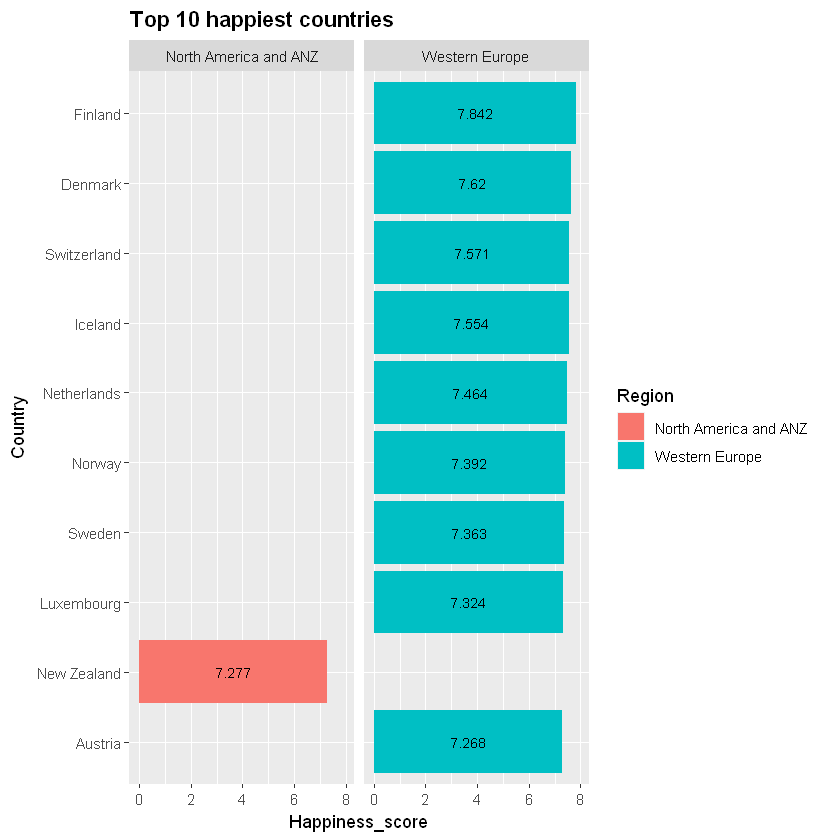

In [8]:
# visualizing the results
ggplot(ten_happiest_countries, 
       aes(x = reorder(Country,Happiness_score), y = Happiness_score, fill = Region)) + 
  geom_col() +
  geom_text(aes(label = Happiness_score),
            position = position_stack(vjust = 0.5), size = 3) +
  labs(title = "Top 10 happiest countries",
       x = "Country", y = "Happiness_score", fill = "Region") +
coord_flip() + 
  theme(plot.title = element_text(face = "bold")) +
ylim(0,max(ten_happiest_countries$Happiness_score) + 0.1) + 
facet_grid(cols = vars(Region))


* ##### Finland was ranked the happiest country in the 2021 Report with a score of 7.842,followed by Denmark and Switzerland.
* ##### The North American Country : New Zaland is in the Top 10.

###  2. The 10 Least happiest countries

In [9]:
# 10 least happies countries
ten_least_happiest_countries <- sqlQuery(conn,"SELECT TOP(10) Country,Happiness_score,Region FROM WHREPORT2021
ORDER BY Happiness_score ASC ")
ten_least_happiest_countries

Country,Happiness_score,Region
Afghanistan,2.523,South Asia
Zimbabwe,3.145,Sub-Saharan Africa
Rwanda,3.415,Sub-Saharan Africa
Botswana,3.467,Sub-Saharan Africa
Lesotho,3.512,Sub-Saharan Africa
Malawi,3.600,Sub-Saharan Africa
Haiti,3.615,Latin America and Caribbean
Tanzania,3.623,Sub-Saharan Africa
Yemen,3.658,Middle East and North Africa
Burundi,3.775,Sub-Saharan Africa


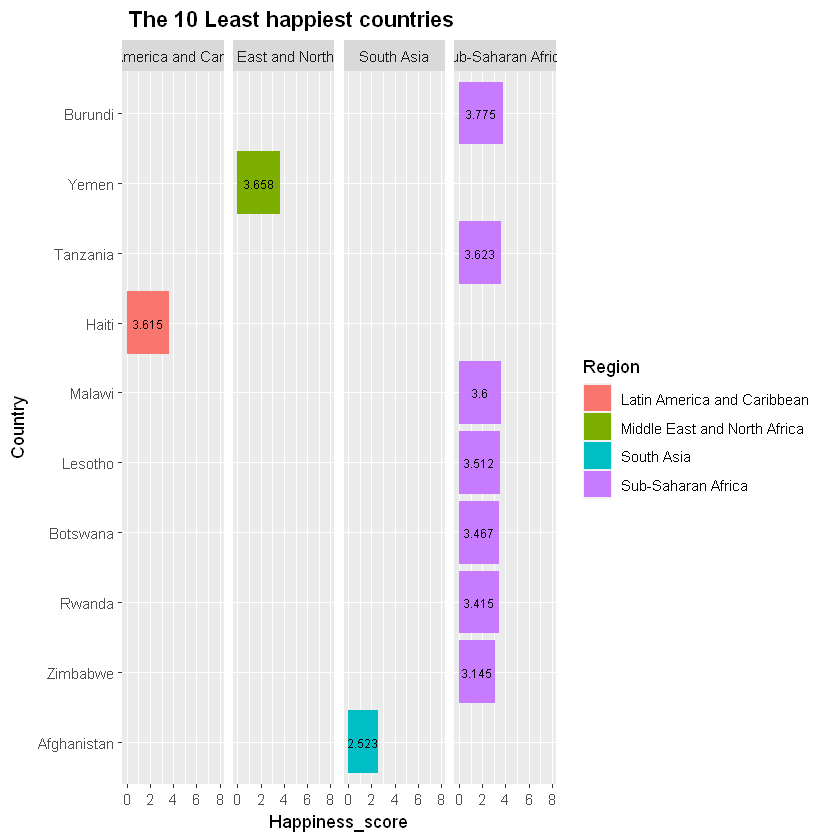

In [10]:
# visualizing the results
ggplot(ten_least_happiest_countries, 
       aes(x = reorder(Country,Happiness_score), y = Happiness_score, fill = Region)) + 
  geom_col() +
  geom_text(aes(label = Happiness_score),
            position = position_stack(vjust = 0.5), size = 2.5) +
  labs(title = " The 10 Least happiest countries",
       x = "Country", y = "Happiness_score", fill = "Region") + 
  theme(plot.title = element_text(face = "bold")) +
ylim(0,max(ten_happiest_countries$Happiness_score) + 0.1) + 
facet_grid(cols = vars(Region)) + 
coord_flip() 

* ##### Afghanistan has the lowest score in 2021 with a score of 2.52.
* ##### Sub saharan Africa has the most countries in the bottom 10. 

### 3. Average Happiness Score per Region

In [11]:
# Average Happiness Score per Region
Avg_Happiness_score_vs_region <- sqlQuery(conn,"SELECT Region,AVG(Happiness_score) AS Average_Happiness_Score
FROM WHREPORT2021
GROUP BY Region 
ORDER BY Average_Happiness_Score DESC")
Avg_Happiness_score_vs_region

Region,Average_Happiness_Score
North America and ANZ,7.128500
Western Europe,6.914904
Central and Eastern Europe,5.984764
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407555
Middle East and North Africa,5.219764
Sub-Saharan Africa,4.494472
South Asia,4.441857


* ##### we can see that North Amercia and ANZ have the best average happiness score across all of the regions. 
* ##### Even though we saw multiple countries from the Sub-Saharian Africa land in the bottom 10, it seems that Afghanistan score drops south Asia Average Happiness score below Sub-Saharian Africa and places it to the bottom of the list by 0.05

### 4. Let's see which countries for each region explains the happiness score , that is which countries contributes the most to the average happiness score of each region.

#### 4.1 North America and ANZ

In [12]:
# Average Happiness Score per Region
Happiness_score_vs_NorthAmericaAnz <- sqlQuery(conn,"SELECT TOP(5) Country,Happiness_score
FROM WHREPORT2021 WHERE Region = 'North America and ANZ'
ORDER BY Happiness_score DESC")
Happiness_score_vs_NorthAmericaAnz

Country,Happiness_score
New Zealand,7.277
Australia,7.183
Canada,7.103
United States,6.951


##### The countries that contribute the most to higher Average happiness score for the Region of North America and ANZ are : 
* New Zealand 
* Australia
* Canada 
* United States

#### 4.2 Western Europe

In [76]:
Happiness_score_vs_WesternEurope <- sqlQuery(conn,"SELECT TOP(5) Country,Happiness_score
FROM WHREPORT2021 WHERE Region = 'Western Europe'
ORDER BY Happiness_score DESC")
Happiness_score_vs_WesternEurope

Country,Happiness_score
Finland,7.842
Denmark,7.620
Switzerland,7.571
Iceland,7.554
Netherlands,7.464


##### The countries that contribute the most to higher Average happiness score for the Region of Western Europe are : 
* Finland
* Denmark
* Switzerland
* Iceland
* Netherlands

#### We have looked at the 2 regions with the highest happiness score , we will do the same exercise for the 2 regions with the lowest happiness score : Subsaharan Africa and South Asia.

#### 4.3 South Asia

In [13]:
Happiness_score_vs_South_Asia <- sqlQuery(conn,"SELECT TOP(5) Country,Happiness_score
FROM WHREPORT2021 WHERE Region = 'South Asia'
ORDER BY Happiness_score ASC")
Happiness_score_vs_South_Asia

Country,Happiness_score
Afghanistan,2.523
India,3.819
Sri Lanka,4.325
Pakistan,4.934
Bangladesh,5.025


##### The countries that contributed the most to lower Average happiness score for the Region of South Asia are : 
* Afghanistan
* India

##### Afghanistan contributed the most with a score of 2.523 , the difference between its average happiness score and India's happiness score is 1.2 which is quite high taking into account that the difference within the rest of countries range from 0.1 to 0.6

#### 4.4Sub Saharan Africa

In [82]:
Happiness_score_vs_Subsaharan_Africa <- sqlQuery(conn,"SELECT TOP(5) Country,Happiness_score
FROM WHREPORT2021 WHERE Region = 'Sub-Saharan Africa'
ORDER BY Happiness_score ASC")
Happiness_score_vs_Subsaharan_Africa

Country,Happiness_score
Zimbabwe,3.145
Rwanda,3.415
Botswana,3.467
Lesotho,3.512
Malawi,3.600


###### The countries that contributed the most to lower average happiness score are : 
* Zimbabwe
* Rwanda
* Botswana 
* Lesotho
* Malawi

### 5. what are the top 10 countries for healthy life expectancy?

In [14]:
top10_life_expectancy <- sqlQuery(conn,"SELECT TOP(10) Country,Healthy_life_expectancy,Region FROM WHREPORT2021
ORDER BY Healthy_life_expectancy DESC ")
top10_life_expectancy

Country,Healthy_life_expectancy,Region
Singapore,76.953,Southeast Asia
Hong Kong S.A.R. of China,76.820,East Asia
Japan,75.100,East Asia
Spain,74.700,Western Europe
Switzerland,74.400,Western Europe
France,74.000,Western Europe
Australia,73.900,North America and ANZ
South Korea,73.900,East Asia
Cyprus,73.898,Western Europe
North Cyprus,73.898,Western Europe


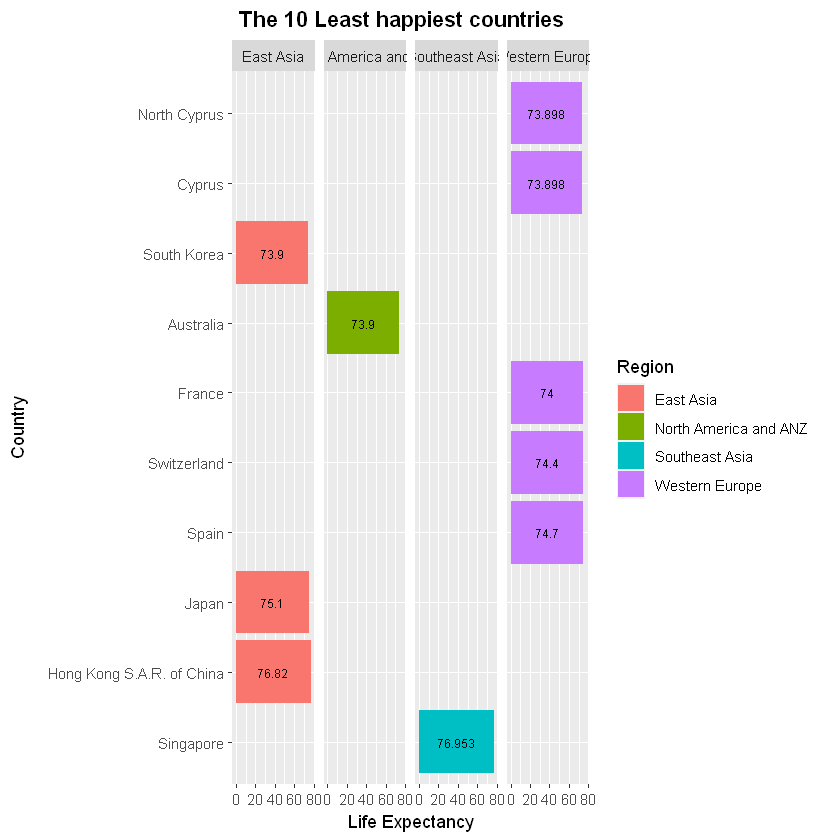

In [15]:
# visualizing the results
ggplot(top10_life_expectancy, 
       aes(x = reorder(Country,-Healthy_life_expectancy), y = Healthy_life_expectancy, fill = Region)) + 
  geom_col() +
  geom_text(aes(label = Healthy_life_expectancy),
            position = position_stack(vjust = 0.5), size = 2.5) +
  labs(title = " The 10 Least happiest countries",
       x = "Country", y = "Life Expectancy", fill = "Region") + 
  theme(plot.title = element_text(face = "bold")) +
ylim(0,max(top10_life_expectancy$Healthy_life_expectancy) + 0.1) + 
facet_grid(cols = vars(Region)) + 
coord_flip() 

##### Most countries with highest life expectancy are in the region of western europe , followed by East Asia countries.

### 6. What are  10 the most generous countries with the best social support? is there any relationship?

In [107]:
top10_social_support <- sqlQuery(conn,"SELECT TOP(10) Country,Social_support,Generosity,Region FROM WHREPORT2021
ORDER BY Generosity DESC,Social_support DESC ")
top10_social_support

Country,Social_support,Generosity,Region
Indonesia,0.811,0.542,Southeast Asia
Myanmar,0.779,0.509,Southeast Asia
Gambia,0.690,0.424,Sub-Saharan Africa
Haiti,0.540,0.422,Latin America and Caribbean
Uzbekistan,0.918,0.311,Commonwealth of Independent States
Thailand,0.888,0.287,Southeast Asia
Kenya,0.688,0.287,Sub-Saharan Africa
Turkmenistan,0.983,0.273,Commonwealth of Independent States
Kosovo,0.821,0.257,Central and Eastern Europe
United Kingdom,0.934,0.233,Western Europe


COMENTAR

#### 6.1 Checking if there is any relationship between social support and generosity  using the correlation coefficient in SQL and then calculating it using R to compare.

The correlation coefficient is a statistical measure of the strength of a linear relationship between two variables. Its values can range from -1 to 1. A correlation coefficient of -1 describes a perfect negative, or inverse, correlation, with values in one series rising as those in the other decline, and vice versa. A coefficient of 1 shows a perfect positive correlation, or a direct relationship. A correlation coefficient of 0 means there is no linear relationship.
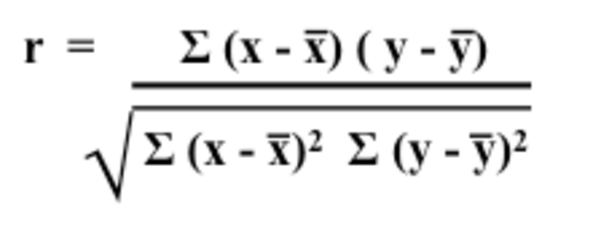

In [99]:
# Calculating it in SQL
correlation_coefficient <- sqlQuery(conn,"SELECT round((Avg(Social_support*Generosity) - (Avg(Social_support) * Avg(Generosity))) / (StDevP(Social_support) * StDevP(Generosity)),4) AS 'correlation'
FROM WHREPORT2021 ")
correlation_coefficient

correlation
-0.1149


In [101]:
# Calculating it in R  
round(cor(WH2021_report$Social_support, WH2021_report$Generosity, method = "pearson"),digits=4)

[1] -0.1149

##### The correlation coefficient between social support and Generosity is -0.1149 which is quite low indicating that there is no direct relationship between country's social support and generosity.

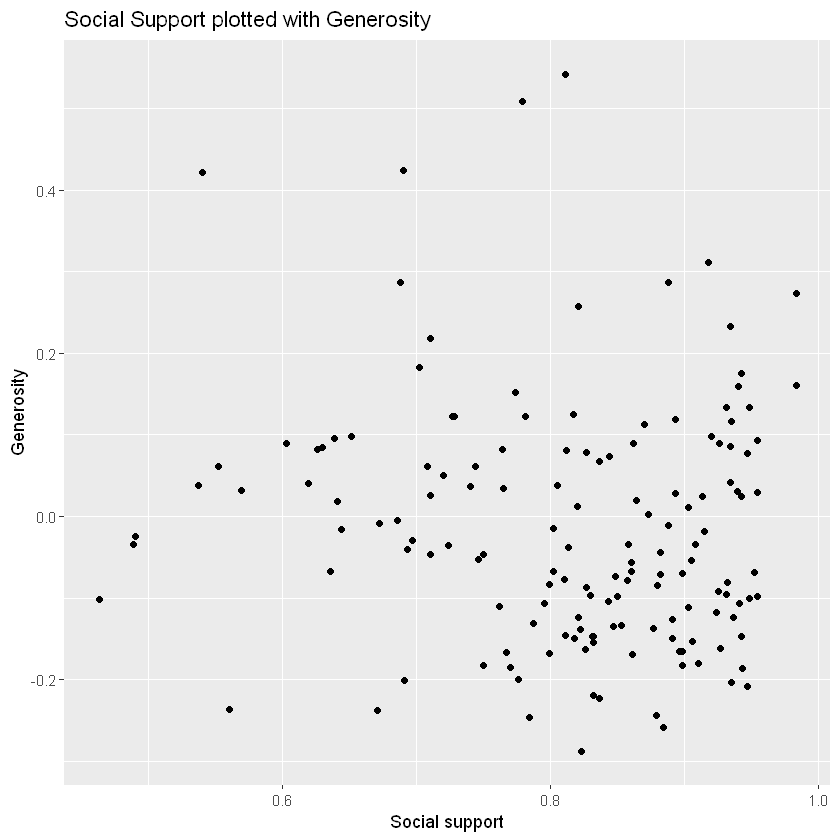

In [104]:
# visualizing the relationship
ggplot(WH2021_report, aes(x = Social_support, 
                    y = Generosity)) +
geom_point() +
labs(title = "Social Support plotted with Generosity", 
     x = "Social support", 
     y = "Generosity") +
scale_color_gradient(low = "#000428", high = "#a1c4fd")

### 7. What are the Top 10 countries with the highest healthy life expectancy and GDP per capita? Is there any relationship?

In [108]:
top10_life_expectancy <- sqlQuery(conn,"SELECT TOP(10) Country,Healthy_life_expectancy,Economy_gdp_per_capital,Region FROM WHREPORT2021
ORDER BY Healthy_life_expectancy DESC,Economy_gdp_per_capital DESC ")
top10_life_expectancy

Country,Healthy_life_expectancy,Economy_gdp_per_capital,Region
Singapore,76.953,11.488,Southeast Asia
Hong Kong S.A.R. of China,76.820,11.000,East Asia
Japan,75.100,10.611,East Asia
Spain,74.700,10.571,Western Europe
Switzerland,74.400,11.117,Western Europe
France,74.000,10.704,Western Europe
Australia,73.900,10.796,North America and ANZ
South Korea,73.900,10.651,East Asia
Cyprus,73.898,10.576,Western Europe
North Cyprus,73.898,10.576,Western Europe


#### 7.1 Checking if there is any relationship between life expectancy and Gdp per capita using the correlation coefficient in SQL and then calculating it using R to compare.

In [109]:
# Calculating it in SQL
correlation_coefficient <- sqlQuery(conn,"SELECT round((Avg(Healthy_life_expectancy*Economy_gdp_per_capital) - (Avg(Healthy_life_expectancy) * Avg(Economy_gdp_per_capital))) / (StDevP(Healthy_life_expectancy) * StDevP(Economy_gdp_per_capital)),4) AS 'correlation'
FROM WHREPORT2021 ")
correlation_coefficient

correlation
0.8595


In [112]:
# Calculating it in R  
round(cor(WH2021_report$Healthy_life_expectancny, WH2021_report$Economy_gdp_per_capital, method = "pearson"),digits=4)

[1] 0.8595

COMENTAR

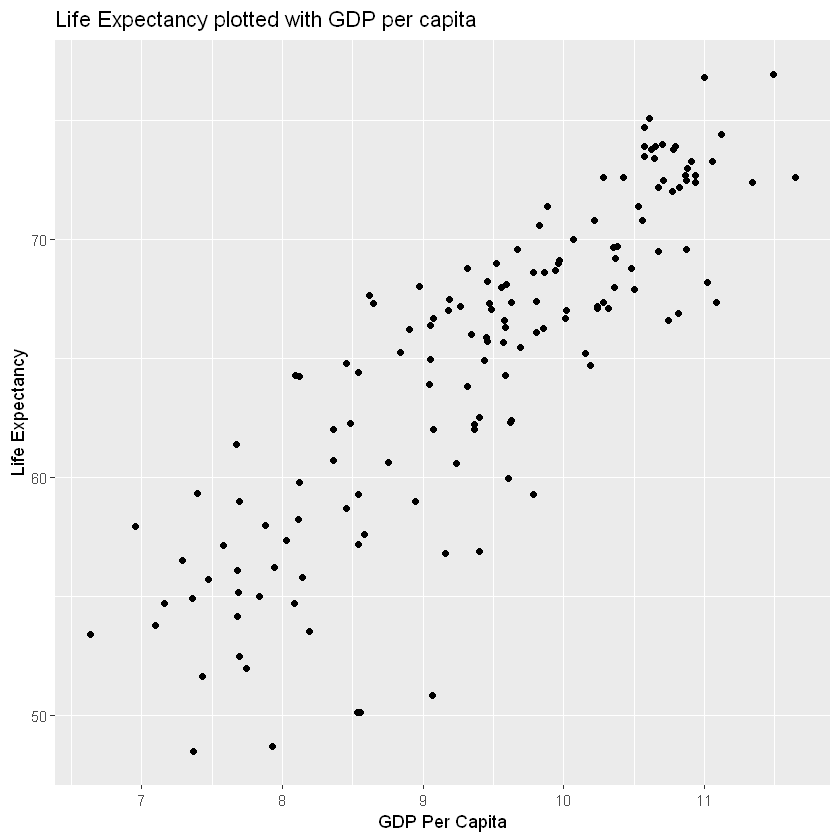

In [113]:
# plotting it using a scatterplot
ggplot(WH2021_report, aes(x = Economy_gdp_per_capital, 
                    y = Healthy_life_expectancny)) +
geom_point() +
labs(title = "Life Expectancy plotted with GDP per capita", 
     x = "GDP Per Capita", 
     y = "Life Expectancy") +
scale_color_gradient(low = "#000428", high = "#a1c4fd")

### 8. Is there is any relationship between happiness score , life expectancy , gdp per capita and social support

In [119]:
# calculating the correlation coefficients
correlation_coefficients <- sqlQuery(conn,"SELECT round((Avg(Healthy_life_expectancy*Happiness_score) - (Avg(Healthy_life_expectancy) * Avg(Happiness_score))) / (StDevP(Healthy_life_expectancy) * StDevP(Happiness_score)),2) AS 'correlation of happiness score vs life expectancy',
round((Avg(Economy_gdp_per_capital*Happiness_score) - (Avg(Economy_gdp_per_capital) * Avg(Happiness_score))) / (StDevP(Economy_gdp_per_capital) * StDevP(Happiness_score)),2) AS 'correlation of happiness score vs GDP per capita',
round((Avg(Social_support*Happiness_score) - (Avg(Social_support) * Avg(Happiness_score))) / (StDevP(Social_support) * StDevP(Happiness_score)),2) AS 'correlation of happiness score vs social support'
FROM WHREPORT2021")
correlation_coefficients

correlation of happiness score vs life expectancy,correlation of happiness score vs GDP per capita,correlation of happiness score vs social support
0.77,0.79,0.76


In [116]:
# calculating in R 
data_correlation <- WH2021_report[,c("Happiness_score","Healthy_life_expectancny","Economy_gdp_per_capital","Social_support")]
head(data_correlation,1)

Happiness_score,Healthy_life_expectancny,Economy_gdp_per_capital,Social_support
7.842,72,10.775,0.954


In [120]:
res <- cor(data_correlation)
round(res, 2)

,Happiness_score,Healthy_life_expectancny,Economy_gdp_per_capital,Social_support
Happiness_score,1.00,0.77,0.79,0.76
Healthy_life_expectancny,0.77,1.00,0.86,0.72
Economy_gdp_per_capital,0.79,0.86,1.00,0.79
Social_support,0.76,0.72,0.79,1.00


##### Having a higher number in life expectancy, GDP per capita, and/or social support result in higher happiness score. The variable that is most correlated with the happiness score is the GDP per capita.

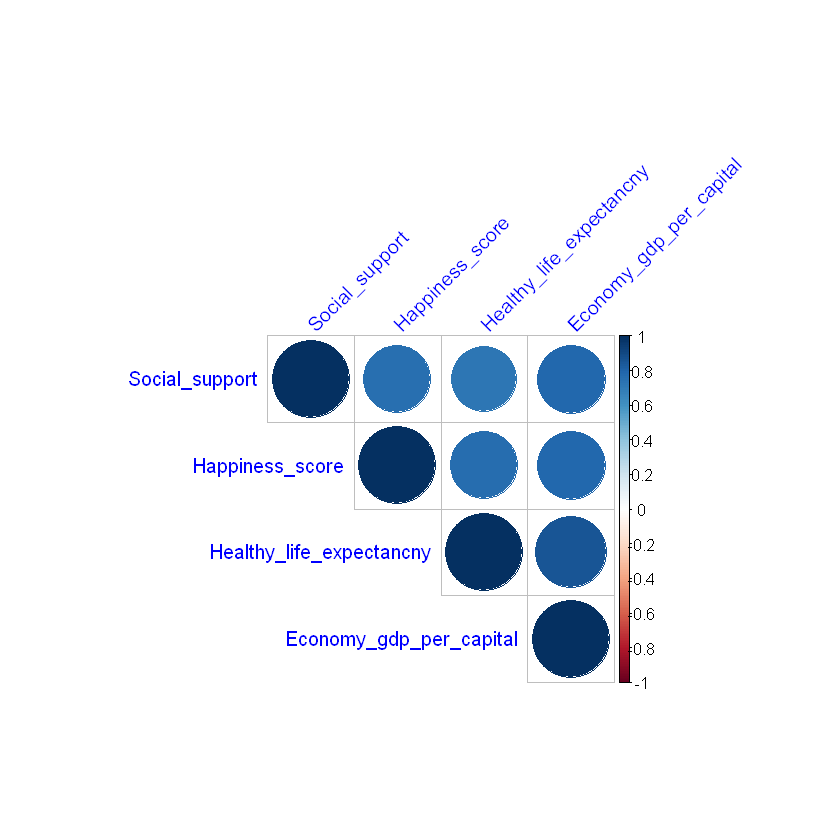

In [122]:
# visualizing the correlation matrix
corrplot(res, type = "upper", order = "hclust", 
         tl.col = "blue", tl.srt = 45)